In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline
sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("paddydataset.csv")


In [5]:
df = pd.read_csv("paddydataset.csv")
display(df.head())
print("\nSütun isimleri:", list(df.columns))
print("\nBoyut:", df.shape)


,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,SSE,W,SW,NW,72.7,91,83,81,600,34044



Sütun isimleri: ['Hectares ', 'Agriblock', 'Variety', 'Soil Types', 'Seedrate(in Kg)', 'LP_Mainfield(in Tonnes)', 'Nursery', 'Nursery area (Cents)', 'LP_nurseryarea(in Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb', 'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days', 'Pest_60Day(in ml)', '30DRain( in mm)', '30DAI(in mm)', '30_50DRain( in mm)', '30_50DAI(in mm)', '51_70DRain(in mm)', '51_70AI(in mm)', '71_105DRain(in mm)', '71_105DAI(in mm)', 'Min temp_D1_D30', 'Max temp_D1_D30', 'Min temp_D31_D60', 'Max temp_D31_D60', 'Min temp_D61_D90', 'Max temp_D61_D90', 'Min temp_D91_D120', 'Max temp_D91_D120', 'Inst Wind Speed_D1_D30(in Knots)', 'Inst Wind Speed_D31_D60(in Knots)', 'Inst Wind Speed_D61_D90(in Knots)', 'Inst Wind Speed_D91_D120(in Knots)', 'Wind Direction_D1_D30', 'Wind Direction_D31_D60', 'Wind Direction_D61_D90', 'Wind Direction_D91_D120', 'Relative Humidity_D1_D30', 'Relative Humidity_D31_D60', 'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120', 'Trash(in bundles)',

In [6]:
df = pd.read_csv("paddydataset.csv")
display(df.head())
print("\nSütun isimleri:", list(df.columns))
print("\nBoyut:", df.shape)


,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D1_D30,Wind Direction_D31_D60,Wind Direction_D61_D90,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,SW,W,NNW,WSW,72.0,78,88,85,540,35028
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,NW,S,SE,SSE,64.6,85,84,87,600,35412
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,ENE,NE,NNE,W,85.0,96,84,79,600,36300
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,W,WNW,SE,S,88.5,95,81,84,540,35016
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,SSE,W,SW,NW,72.7,91,83,81,600,34044



Sütun isimleri: ['Hectares ', 'Agriblock', 'Variety', 'Soil Types', 'Seedrate(in Kg)', 'LP_Mainfield(in Tonnes)', 'Nursery', 'Nursery area (Cents)', 'LP_nurseryarea(in Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb', 'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days', 'Pest_60Day(in ml)', '30DRain( in mm)', '30DAI(in mm)', '30_50DRain( in mm)', '30_50DAI(in mm)', '51_70DRain(in mm)', '51_70AI(in mm)', '71_105DRain(in mm)', '71_105DAI(in mm)', 'Min temp_D1_D30', 'Max temp_D1_D30', 'Min temp_D31_D60', 'Max temp_D31_D60', 'Min temp_D61_D90', 'Max temp_D61_D90', 'Min temp_D91_D120', 'Max temp_D91_D120', 'Inst Wind Speed_D1_D30(in Knots)', 'Inst Wind Speed_D31_D60(in Knots)', 'Inst Wind Speed_D61_D90(in Knots)', 'Inst Wind Speed_D91_D120(in Knots)', 'Wind Direction_D1_D30', 'Wind Direction_D31_D60', 'Wind Direction_D61_D90', 'Wind Direction_D91_D120', 'Relative Humidity_D1_D30', 'Relative Humidity_D31_D60', 'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120', 'Trash(in bundles)',

In [7]:
print(df.info())
print("\nEksik değer sayıları:\n", df.isnull().sum())
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2789 non-null   int64  
 1   Agriblock                           2789 non-null   object 
 2   Variety                             2789 non-null   object 
 3   Soil Types                          2789 non-null   object 
 4   Seedrate(in Kg)                     2789 non-null   int64  
 5   LP_Mainfield(in Tonnes)             2789 non-null   float64
 6   Nursery                             2789 non-null   object 
 7   Nursery area (Cents)                2789 non-null   int64  
 8   LP_nurseryarea(in Tonnes)           2789 non-null   int64  
 9   DAP_20days                          2789 non-null   int64  
 10  Weed28D_thiobencarb                 2789 non-null   int64  
 11  Urea_40Days                         2789 no

,Hectares,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,...,Inst Wind Speed_D1_D30(in Knots),Inst Wind Speed_D31_D60(in Knots),Inst Wind Speed_D61_D90(in Knots),Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg)
count,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,...,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000
mean,3.717461,92.936536,46.468268,74.349229,3.717461,148.698458,7.434923,100.854729,38.587250,55.761922,...,7.233417,8.512729,8.172822,9.449265,76.256938,87.594120,85.160272,83.859448,335.510936,22517.728935
std,1.437777,35.944420,17.972210,28.755536,1.437777,57.511072,2.875554,39.006885,14.924123,21.566652,...,2.566549,3.203679,1.993596,2.516664,8.001361,6.776736,3.492529,3.134875,134.314772,9199.661393
min,1.000000,25.000000,12.500000,20.000000,1.000000,40.000000,2.000000,27.130000,10.380000,15.000000,...,4.000000,4.000000,4.000000,6.000000,64.600000,78.000000,81.000000,79.000000,80.000000,5410.000000
25%,3.000000,75.000000,37.500000,60.000000,3.000000,120.000000,6.000000,81.390000,31.140000,45.000000,...,4.000000,6.000000,8.000000,6.000000,72.000000,80.000000,83.000000,81.000000,240.000000,16389.000000
50%,4.000000,100.000000,50.000000,80.000000,4.000000,160.000000,8.000000,108.520000,41.520000,60.000000,...,8.000000,10.000000,8.000000,10.000000,72.700000,91.000000,84.000000,84.000000,360.000000,24636.000000
75%,5.000000,125.000000,62.500000,100.000000,5.000000,200.000000,10.000000,135.650000,51.900000,75.000000,...,10.000000,12.000000,10.000000,12.000000,85.000000,95.000000,88.000000,87.000000,450.000000,31035.000000
max,6.000000,150.000000,75.000000,120.000000,6.000000,240.000000,12.000000,162.780000,62.280000,90.000000,...,10.000000,12.000000,10.000000,12.000000,88.500000,96.000000,92.000000,88.000000,600.000000,38814.000000


In [8]:
target_column = "Paddy yield(in Kg)"
print("Seçilen hedef sütun:", target_column)

X = df.drop(target_column, axis=1)
y = df[target_column]

print("X shape:", X.shape)
print("y shape:", y.shape)


Seçilen hedef sütun: Paddy yield(in Kg)
X shape: (2789, 44)
y shape: (2789,)


In [9]:
X = pd.get_dummies(X, drop_first=True)

X = X.fillna(X.mean())
y = y.fillna(y.mean())

print("Ön işleme sonrası X shape:", X.shape)


Ön işleme sonrası X shape: (2789, 63)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Eğitim örnekleri:", X_train.shape[0], "Test örnekleri:", X_test.shape[0])


Eğitim örnekleri: 2231 Test örnekleri: 558


In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression ===")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)


=== Linear Regression ===
MAE : 698.3192277400469
RMSE: 927.9359757024184
R2  : 0.9893839755066541


In [13]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== Random Forest ===")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R2  :", r2_rf)



=== Random Forest ===
MAE : 632.2615627907645
RMSE: 887.17202366002
R2  : 0.9902962061139732


In [14]:
svr = SVR(kernel="rbf", C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\n=== SVR ===")
print("MAE :", mae_svr)
print("RMSE:", rmse_svr)
print("R2  :", r2_svr)



=== SVR ===
MAE : 3685.2451019545742
RMSE: 5262.527620404152
R2  : 0.6585597911303842


In [15]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR"],
    "MAE": [mae_lr, mae_rf, mae_svr],
    "RMSE": [rmse_lr, rmse_rf, rmse_svr],
    "R2 Score": [r2_lr, r2_rf, r2_svr]
})
display(results)


,Model,MAE,RMSE,R2 Score
0,Linear Regression,698.319228,927.935976,0.989384
1,Random Forest,632.261563,887.172024,0.990296
2,SVR,3685.245102,5262.527620,0.658560


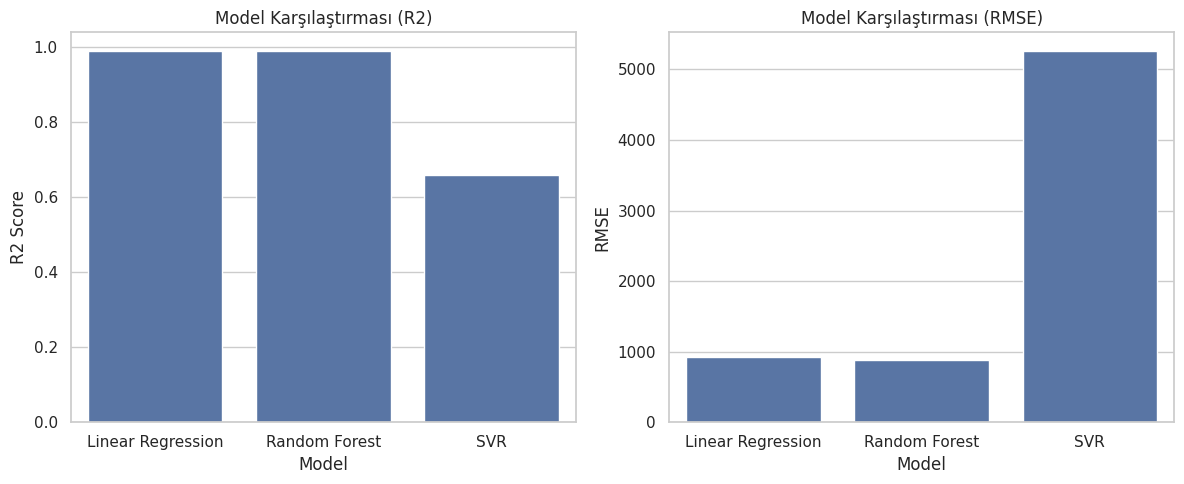

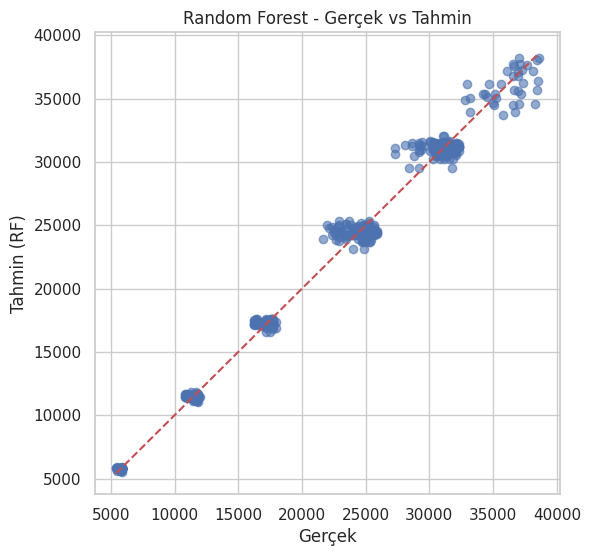

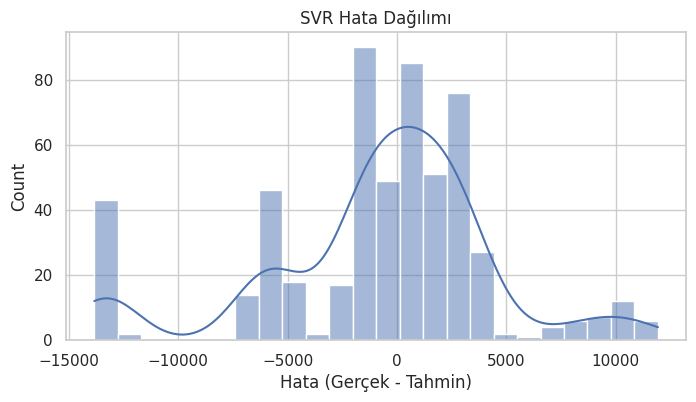

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=results, x="Model", y="R2 Score")
plt.title("Model Karşılaştırması (R2)")

plt.subplot(1,2,2)
sns.barplot(data=results, x="Model", y="RMSE")
plt.title("Model Karşılaştırması (RMSE)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek")
plt.ylabel("Tahmin (RF)")
plt.title("Random Forest - Gerçek vs Tahmin")
plt.show()

errors_svr = y_test - y_pred_svr
plt.figure(figsize=(8,4))
sns.histplot(errors_svr, kde=True)
plt.title("SVR Hata Dağılımı")
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.show()


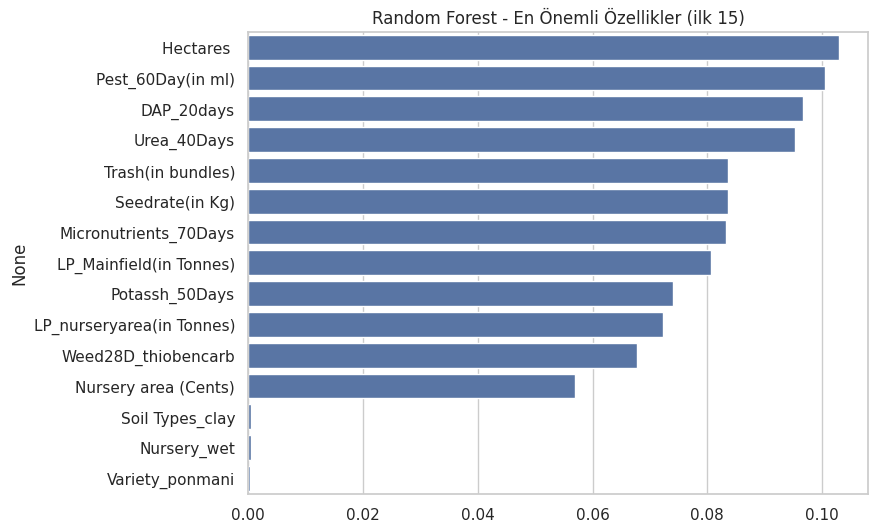

In [17]:
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Random Forest - En Önemli Özellikler (ilk 15)")
plt.show()
